<a href="https://colab.research.google.com/github/Lavya124/Lungs_Cancer_Detection/blob/main/Lungs_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# **2. Importing the Dtataset**

In [ ]:
data = pd.read_csv('cancer patient data sets.csv')

# **3. Taking care of Missing Values**

In [ ]:
data.isnull().sum()

index                       0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swal0ing Difficulty         0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# **4. Taking care of duplicates values**

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

False

# **5. Data Processing**

In [ ]:
cate_val =[]
cont_val = []

for column in data.columns:
  if data[column].nunique() <=3:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [ ]:
cate_val

['Gender', 'Level']

In [ ]:
cont_val

['index',
 'Age',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swal0ing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']

# **6. Encoding Categorical Data**

In [ ]:
cate_val

['Gender', 'Level']

In [ ]:
data['Level'].unique()

array([0, 1])

# **7. Feature Scaling**

In [ ]:
data.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,1
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,1
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,1


# **8. Splitting the Dataset into the training and the test dataset**

In [ ]:
X = data.drop('Level',axis = 1)

In [ ]:
Y = data['Level']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(f"Train Data: {X_train.shape}, {Y_train.shape}")
print(f"Test Data: {X_test.shape}, {Y_test.shape}")

Train Data: (800, 24), (800,)
Test Data: (200, 24), (200,)


# **9. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()
log.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred1)

0.935

In [ ]:
print("Precision Score : ",precision_score(Y_test, Y_pred1,average='micro'))

Precision Score :  0.935


In [ ]:
print("Recall Score : ",recall_score(Y_test, Y_pred1,average='micro'))

Recall Score :  0.935


In [ ]:
print("F1 Score : ",f1_score(Y_test, Y_pred1,average='micro'))

F1 Score :  0.935


# **10. SVC**

In [ ]:
from sklearn import svm
svm= svm.SVC()

In [ ]:
svm.fit(X_train,Y_train)

SVC()

In [ ]:
Y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred2)

0.7

In [ ]:
print("Precision Score : ",precision_score(Y_test, Y_pred2,average='micro'))

Precision Score :  0.7


In [ ]:
print("Recall Score : ",recall_score(Y_test, Y_pred2,average='micro'))

Recall Score :  0.7


In [ ]:
print("F1 Score : ",f1_score(Y_test, Y_pred2,average='micro'))

F1 Score :  0.7


# **11. KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pred3)

0.91

In [ ]:
print("Precision Score : ",precision_score(Y_test, y_pred3,average='micro'))

Precision Score :  0.91


In [ ]:
print("Recall Score : ",recall_score(Y_test, y_pred3,average='micro'))

Recall Score :  0.91


In [ ]:
print("F1 Score : ",f1_score(Y_test, y_pred3,average='micro'))

F1 Score :  0.91


# **12. Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb =  GaussianNB()

In [ ]:
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_pred4 = nb.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pred4)

0.92

In [ ]:
print("Precision Score : ",precision_score(Y_test, y_pred4,average='micro'))

Precision Score :  0.92


In [ ]:
print("Recall Score : ",recall_score(Y_test, y_pred4,average='micro'))

Recall Score :  0.92


In [ ]:
print("F1 Score : ",f1_score(Y_test, y_pred4,average='micro'))

F1 Score :  0.92


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
rf_c = confusion_matrix(Y_test,Y_pred1)
print(rf_c)

[[ 47  13]
 [  0 140]]


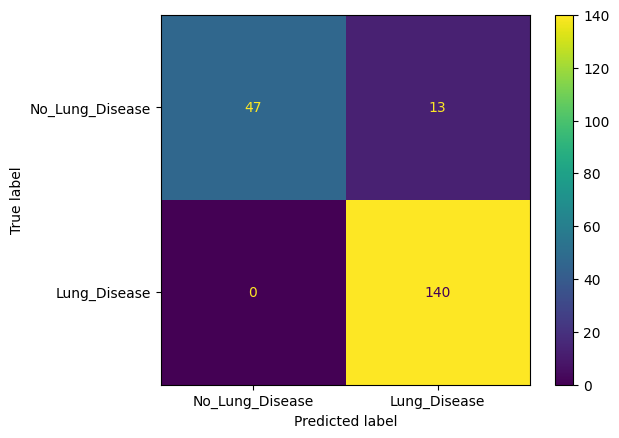

In [ ]:
rf_display = ConfusionMatrixDisplay(confusion_matrix=rf_c, display_labels=["No_Lung_Disease",'Lung_Disease'])
rf_display.plot()

# **14. Accuracy score of train and test data**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
input_data = (5,33,2,3,4,2,3,4,4,4,2,3,3,3,3,2,4,3,4,2,2,4,5,5)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Lungs Disease')
else:
  print('The Person has Lungs Disease')

[0]
The Person does not have a Lungs Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
